# ĮVADAS

Esu žmogus , kurį muzika lydi nuo pat vaikystės. Drebėdavau belaukdama kol tėtis parveš namo naujausias hitų kasetes, vėliau diskus, o kai atsirado namuose pirmasis kompiuteris - pagrinde jį ir naudojau muzikos paieškoms naudodamasi failų dalijimosi platformą "Emule". Tuo metu atrodė kažkas magiško , kad gali vieno mygtuko paspaudimu - atsisiųsti kūrinį iš kito žmogaus kompiuterio. Bėgant metams poreikis naujiems garsams vis augo, išmokau Dj amato, tam prireikė dar labiau plėsti muzikinių kūrinių paieškas. Pagrinde tam naudojau "Youtube", "Soundcloud". Praleisdavau valandų valandas , ieškodama tuometinę nuotaiką atitinkančių dainų. Labiausiai už visas platformas šiuo metu esu įsimylėjusi ir labiausiai naudoju "Spotify". Visa pasaulio muzika, visi muzikiniai stiliai yra viename "appse". Dėl šios priežasties nusprendžiau rinktis panagrinėti Spotify's most popular songs for 2010-2019m. duomenų paketą. 

## Projekto klausimai

1. Populiariausias žanras
2. TOP 10 žanrų 
3. TOP 10 atlikėjų
4. BPM įtaka populiarumui
5. Dainos tempo ir šokumo ryšys
6. Dainos nuotaikos ir šokumo ryšys
7. Žodžių dainoje ir populiarumo ryšys
9. Gyvų instrumentų įtaka populiarumui

## Hipotezės

1. Dainos tempas neįtakoja dainų populiarumo
2. Populiariausias žanras yra POP
3. Daugiau žodžių turinčios dainos yra populiaresnės

# Duomenų paruošimas analizei

In [49]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from matplotlib import rcParams




In [50]:
duomenys = pd.read_csv('/Users/eve/Downloads/top10s.csv', encoding = "ISO-8859-1",index_col=[0])
duomenys.head()



,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [51]:
duomenys.rename(columns={'title':'song', 'artist':'artist', 'top genre':'genre', 
'year':'year', 'bpm':'beats_per_minute','nrgy':'energy',
'dnce':'danceability','dB':'loudness','live':'liveness', 
'val':'valence', 'dur':'length', 'acous':'acousticness',
'spch':'speechiness','pop':'popularity'}, inplace=True)

In [52]:
duomenys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   song              603 non-null    object
 1   artist            603 non-null    object
 2   genre             603 non-null    object
 3   year              603 non-null    int64 
 4   beats_per_minute  603 non-null    int64 
 5   energy            603 non-null    int64 
 6   danceability      603 non-null    int64 
 7   loudness          603 non-null    int64 
 8   liveness          603 non-null    int64 
 9   valence           603 non-null    int64 
 10  length            603 non-null    int64 
 11  acousticness      603 non-null    int64 
 12  speechiness       603 non-null    int64 
 13  popularity        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [53]:
duomenys.head(10)

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


# Duomenų analizė

In [54]:
#Koks viso dešimtmečio populiariausias žanras
# Dance pop
duomenys['genre'].describe()

count           603
unique           50
top       dance pop
freq            327
Name: genre, dtype: object

Text(0.5, 1.0, 'Top 10 žanrai 2010-2019')

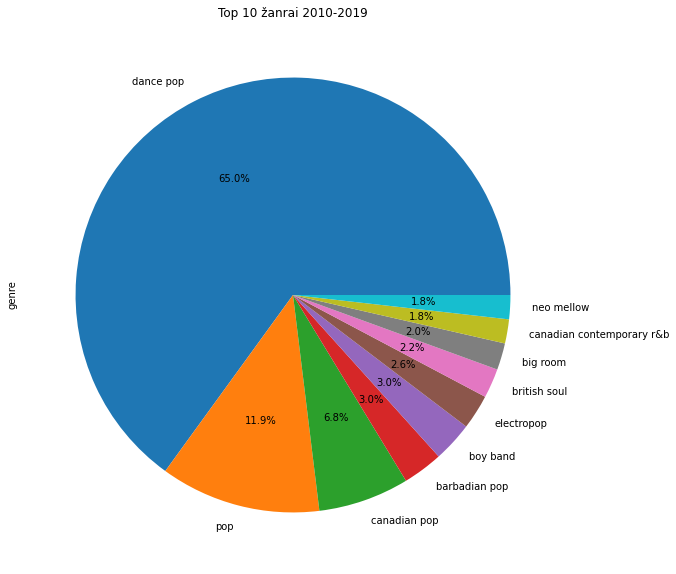

In [55]:
# Top 10 žanrų per dešimtmetį
duomenys['genre'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 žanrai 2010-2019')

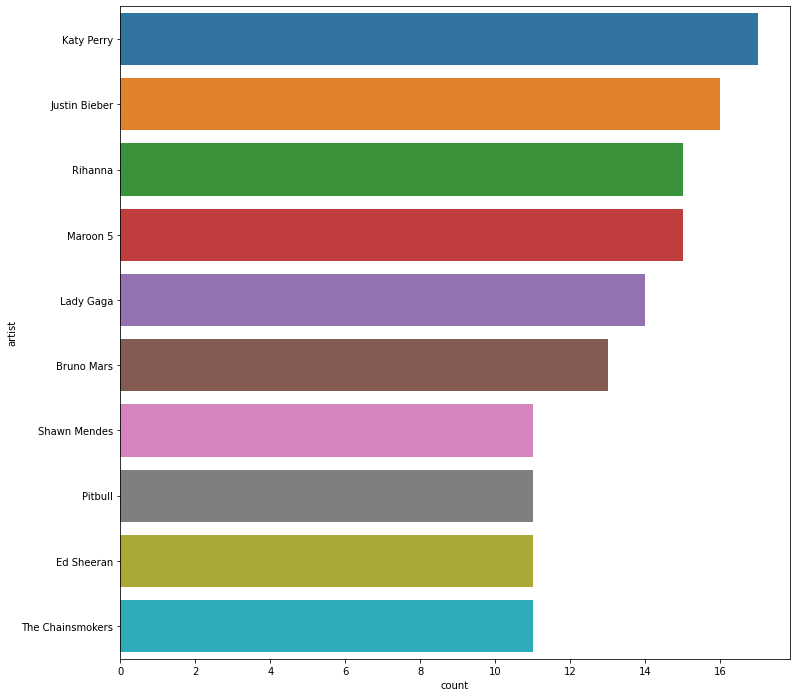

In [56]:
# TOP 10 atikėjų

rcParams['figure.figsize'] =12,12

sns.countplot(y=duomenys['artist'],order=duomenys.artist.value_counts().iloc[:10].index);

In [62]:
#BPM pasiskirstymas procentais
def grouping(x):
    if x<100:
        return '<100'
    elif x<=150:
        return '101-150'
    elif x<=200:
        return '151-200'
    else:
        return '>200'

groupes = duomenys.beats_per_minute.apply(grouping)
values= groupes.value_counts()
labels= values.index
fig = px.pie(values = values,names= labels)
fig.update_layout(title = 'bpm_pasiskirstymas')
fig.show()

In [58]:
#Dainos tempo ir šokumo ryšys
fig = px.scatter(duomenys,x='beats_per_minute', y='danceability',
color='beats_per_minute',hover_name='song',hover_data=['artist','year'])
fig.show()

Labiausiai norisi šokti per dainas,kurių tempas 100-150 BMP

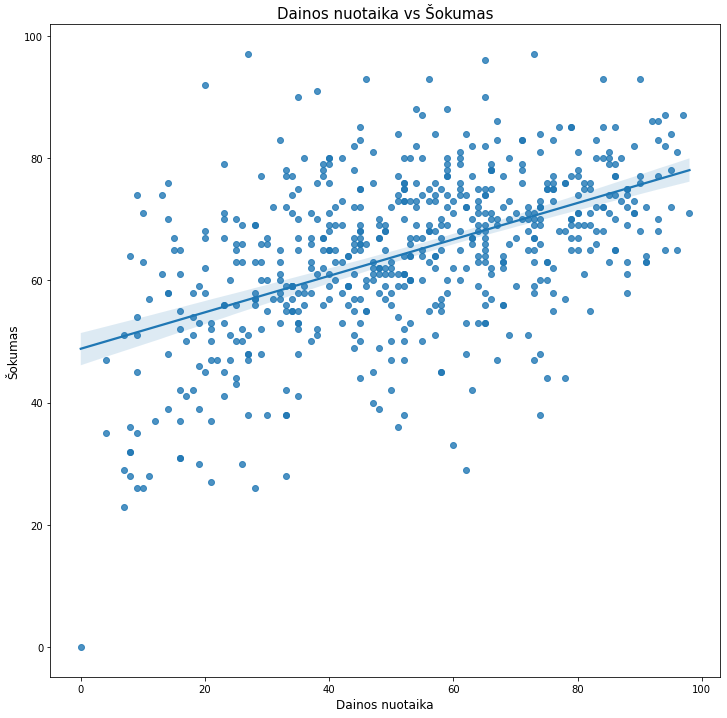

In [59]:
# Dainos nuotaikos bei šokumo sąsaja
sns.regplot(x=duomenys.valence,y=duomenys.danceability).set_title('Dainos nuotaika vs Šokumas',fontsize=15)
plt.xlabel('Dainos nuotaika',fontsize=12);
plt.ylabel('Šokumas',fontsize=12);
                      

Kuo pozityvesnė dainos nuotaika , tuo labiau norisi šokti

In [13]:
# Žodžių dainoje ir populiarumo ryšys
fig = px.scatter(duomenys,x='popularity', y='speechiness',
                 color='speechiness',hover_name='song',hover_data=['artist','year'])
fig.show()

Populiaresnės dainos tos, kuriose mažiau žodžių 

In [60]:
#Populiariausios dainos buvo 134 - 424 sekundžių trukmės
duomenys['length'].describe()

count    603.000000
mean     224.674959
std       34.130059
min      134.000000
25%      202.000000
50%      221.000000
75%      239.500000
max      424.000000
Name: length, dtype: float64

In [61]:
# Gyvų instrumentų įtaka populiarumui
fig = px.scatter(duomenys,x='popularity', y='acousticness',color='popularity',
hover_name='song',hover_data=['artist','year'])
fig.show()

Gyvi instrumentai neįtakoja dainos populiarumo. 

# Išvados

Iš duomenų padariau įžvalgas, jog pirmąją hipotezę paneigiame, nes vis gi dainos tempas stipriai įtakoja ar daina bus populiari. 
Virš 70proc. populiariausiujų yra 101-150BPM. Antrąją hipotezę patvirtinau, kadangi populiariausias žanras buvo "Dance pop", o jis yra "POP" žanro porūšis.
Trečiąją hipotezę paneigiau, nes duomenų analizė parodė, jog kaip tik tos dainos yra populiaresnės,kurios turi mažiau žodžių.